In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# =========================
# 1. Load dataset
# =========================
# Make sure LSWMD.pkl is in the same directory
df = pd.read_pickle("LSWMD.pkl")

print("Dataset loaded.")
print("Shape:", df.shape)
print("Columns:", df.columns)

Dataset loaded.
Shape: (811457, 6)
Columns: Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')


In [9]:
# =========================
# 2. Convert failureType to clean label
# =========================
def to_label(x):
    x = np.array(x)
    if x.size == 0:
        return "unknown"
    return str(x.ravel()[0])

df["label"] = df["failureType"].apply(to_label)

print("Unique labels:", df["label"].unique())

Unique labels: ['none' 'Loc' 'unknown' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random'
 'Near-full' 'Donut']


In [10]:
# =========================
# 3. Extract failure modes (exclude normal and unknown)
# =========================
modes = df["label"].unique()
modes = [m for m in modes if m not in ["none", "unknown"]]

print("Failure modes:", modes)

Failure modes: ['Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch', 'Random', 'Near-full', 'Donut']


In [11]:
# =========================
# 4. Select one representative wafer per failure mode
# =========================
representatives = []

for mode in modes:
    sample = df[df["label"] == mode].iloc[0]
    representatives.append((mode, sample["waferMap"]))

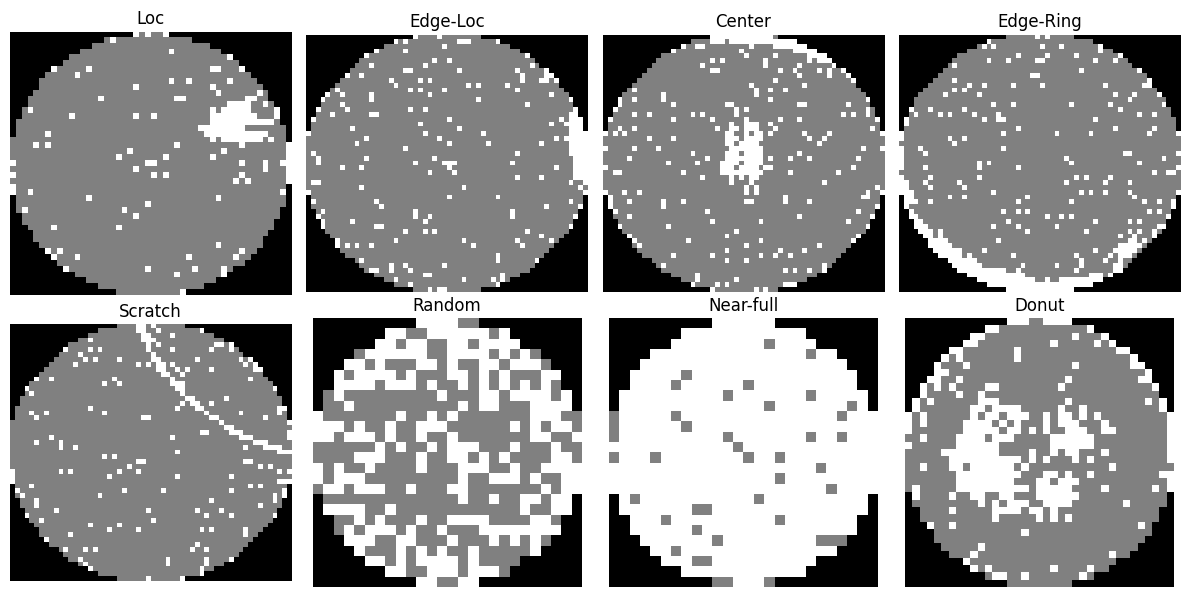

In [12]:
# =========================
# 5. Plot all failure modes
# =========================
n = len(representatives)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(cols*3, rows*3))

for i, (mode, wafer) in enumerate(representatives):
    plt.subplot(rows, cols, i+1)
    plt.imshow(np.array(wafer), cmap="gray")
    plt.title(mode)
    plt.axis("off")

plt.tight_layout()
plt.show()